In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Classify-2DwLabels-2.txt', sep=',', header=None, names=["Col1", "Col2", "Class"])
df["Class"] = df[["Class"]].replace(0,-1)
df.head()

,Col1,Col2,Class
0,-0.33,-0.62,1
1,0.89,-0.67,-1
2,0.98,-0.26,-1
3,-0.55,0.38,1
4,0.43,0.47,-1


In [3]:
train_size = int(0.8 * len(df))
train_set = df[:train_size]
test_set = df[train_size:]

In [4]:
train_set.head()

,Col1,Col2,Class
0,-0.33,-0.62,1
1,0.89,-0.67,-1
2,0.98,-0.26,-1
3,-0.55,0.38,1
4,0.43,0.47,-1


In [5]:
X_train = train_set[["Col1", "Col2"]].to_numpy()
y_train = train_set[["Class"]].to_numpy()
X_test = test_set[["Col1", "Col2"]].to_numpy()
y_test = test_set[["Class"]].to_numpy()

In [6]:

class Perceptron(object):
    def __init__(self, input_dim, n):
        self.weights = np.random.normal(loc=0.0, scale=1.0, size=input_dim)
        self.bias = np.random.normal(loc=0.0, scale=1.0, size=1)
        self.n = n
    
    def activation(self, pred):
        #print(pred.shape, "pred shape")
        #print(self.n)
        return np.where(pred > self.n, 1, 0)
    
    def activation2(self, pred):
        #print(pred.shape, "pred shape")
        return np.where(pred < -self.n, -1, 0)
    
    def predict(self, data, target):
        data_t = data.reshape(-1,1)
        #print(data_t, "data")
        #print((self.weights), "weights")
        #print(self.bias, "bias")
        #print(target, "target")
        #print(target.shape, "target shape")
        #print(((np.dot(data, self.weights))+self.bias).shape)
        if target[0] == 1:   
            return self.activation((np.dot(data, self.weights)+self.bias))
        if target[0] == -1:
            return self.activation2((np.dot(data, self.weights)+self.bias))
    
    def train(self, input_data, targets, epochs, lr=0.01):
        losses = []
        for e in range(1, epochs + 1):
            epoch_loss = 0
            for data, target in zip(input_data, targets):
                pred = self.predict(data, target)
                error = target - pred
                update = lr * error
                epoch_loss += error ** 2
                self.weights += update * data
                self.bias += update
            losses.append(epoch_loss)
        
                
                    
            
        return losses, epoch_loss, self.weights, self.bias

In [8]:

for z in range (1,30):
    n=z*0.003
    p = Perceptron(input_dim=2, n=n)
    losses, epoch_loss, weights, bias = p.train(X_train,y_train, epochs=100)
    print("The loss on the 100th epoch is", epoch_loss, "when n is", round(n,3))
    if epoch_loss > 0:
        break
n=n-0.003
n = round(n, 3)

The loss on the 100th epoch is [0] when n is 0.003
The loss on the 100th epoch is [0] when n is 0.006
The loss on the 100th epoch is [0] when n is 0.009
The loss on the 100th epoch is [0] when n is 0.012
The loss on the 100th epoch is [0] when n is 0.015
The loss on the 100th epoch is [0] when n is 0.018
The loss on the 100th epoch is [0] when n is 0.021
The loss on the 100th epoch is [0] when n is 0.024
The loss on the 100th epoch is [0] when n is 0.027
The loss on the 100th epoch is [0] when n is 0.03
The loss on the 100th epoch is [3] when n is 0.033


In [9]:
print("The value used for n to maximize the margin is: ", n)
print("The weights used are:", weights)
print("The bias is:", bias)

The value used for n to maximize the margin is:  0.03
The weights used are: [-0.56238244 -0.28913573]
The bias is: [0.02813114]


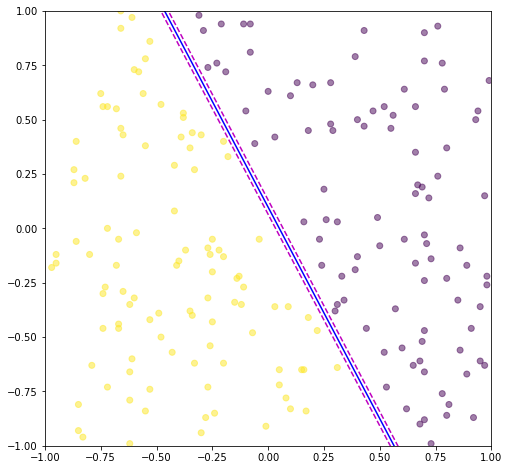

In [10]:
# graph with the train data 
x_min = -1
x_max = 1
y_min = -1
y_max = 1
xx = np.linspace(x_min, x_max)
a = -weights[0]/weights[1]
yy = a*xx - (bias)/weights[1]
yy_neg = yy - np.sqrt(1 + a**2) * n/2
yy_pos = yy + np.sqrt(1 + a**2) * n/2
plt.figure(figsize=(8, 8))
plt.plot(xx, yy, "b-")
plt.plot(xx, yy_neg, "m--")
plt.plot(xx, yy_pos, "m--")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), alpha=0.5)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

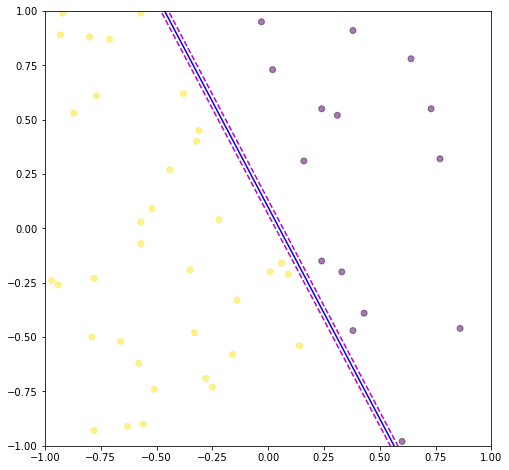

In [11]:
# graph with the test data 
x_min = -1
x_max = 1
y_min = -1
y_max = 1
xx = np.linspace(x_min, x_max)
a = -weights[0]/weights[1]
yy = a*xx - (bias)/weights[1]
yy_neg = yy - np.sqrt(1 + a**2) * n/2
yy_pos = yy + np.sqrt(1 + a**2) * n/2
plt.figure(figsize=(8, 8))
plt.plot(xx, yy, "b-")
plt.plot(xx, yy_neg, "m--")
plt.plot(xx, yy_pos, "m--")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.ravel(), alpha=0.5)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [12]:
#x values on graph
xx = X_test[:,0]
a = -weights[0]/weights[1]
#y values on graph from x values that correspond w hyperplane
yy = a*xx - (bias)/weights[1]

In [13]:
y_pred = np.zeros(50)
# y predicted is 1 if the y values on the graph are below the hyperplane
# y predicted is -1 if the y values on the graph are above the hyperplane
for x in range(X_test.shape[0]):
    if X_test[x,1] <= yy[x]:
        y_pred[x] = 1
    if X_test[x,1] >= yy[x]:
        y_pred[x] = -1
y_pred = y_pred.astype(int)

In [14]:
loss = 0
# add to loss if predicted y values do not match validation y
for x in range(X_test.shape[0]):
    if y_pred[x] != y_test[x,0]:
        loss += 1


In [15]:
print("The empirical validation loss is:", loss)

The empirical validation loss is: 0


In [16]:
print("The hyperplane is y=", (-weights[0]/weights[1]),"x +",-bias/weights[1])

The hyperplane is y= -1.9450464578719402 x + [0.09729387]


In [17]:
print("The margin is: ", n)

The margin is:  0.03
